<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/trabajos/Ajedrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este caso teórico-práctico se va a analizar el dataset [Chess Game Dataset (Lichess)](https://www.kaggle.com/datasnaek/chess).

Primero se expondrán los datos que aporten un mayor valor para el entendimiento de éstos.

A continuación, se realizarán las preguntas pertinentes para la correcta comprensión de dichos datos. Se centrará en los datos que se considere tienen unas correlaciones de mayor peso.

# Análisis de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargamos los datos en Pandas
games = pd.read_csv("data/games.csv")
#Mostramos .head() para ver los datos
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4.0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3.0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3.0
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5.0


1.¿Cuál es el porcentaje de victorias de los jugadores con blancas?


In [ ]:
white_winners = games.loc[games['winner'] == "white"]
percent_white = (white_winners.shape[0] / games.shape[0]) * 100
print(f"Ganan las blancas el {percent_white}")

Ganan las blancas el 50.05780346820809


2.¿Cuál es el porcentaje de tablas?

In [ ]:
draw = games.loc[games['winner'] == "draw"]
percent_draw = (draw.shape[0] / games.shape[0]) * 100
print(f"Empate el {percent_draw}")

Empate el 4.2952423299244105


3.¿Cuál es el porcentaje de victorias de los jugadores con negras?






In [ ]:
black_winners = games.loc[games['winner'] == "black"]
percent_black = (black_winners.shape[0] / games.shape[0]) * 100
print(f"Ganan las negras el {percent_black}")

Ganan las negras el 45.646954201867494


4.¿Cuál es el ratio de los diferentes resultados cuando los jugadores se diferencián en menos de 100 puntos de ELO?




In [ ]:
#Añadimos un campo que indica la diferencia de ELO entre los jugadores
games['diff_elo'] = abs(games['white_rating'] - games['black_rating'])
games.head()

def calculate_win_rates(games, mode, max=0, min=0, equal=0, round_to=2):
  #Obtenemos el subconjunto de datos
  if (mode=="smaller"):
    diff_elo = games.loc[games['diff_elo'] < max]
  elif (mode=="greater"):
    diff_elo = games.loc[games['diff_elo'] > min]
  elif (mode=="between"):
    diff_elo = games.loc[(games['diff_elo'] >= min) & (games['diff_elo'] <= max)]
  else:
    raise Exception("Mode not implemented")
  #Obtenemos los subsets
  white_subset = diff_elo.loc[diff_elo['winner'] == "white"]
  draw_subset = diff_elo.loc[diff_elo['winner'] == "draw"]
  black_subset = diff_elo.loc[diff_elo['winner'] == "black"]
  #Calculamos las estadísticas
  white_percent = (white_subset.shape[0] / diff_elo.shape[0]) * 100
  draw_percent = (draw_subset.shape[0] / diff_elo.shape[0]) * 100
  black_percent = (black_subset.shape[0] / diff_elo.shape[0]) * 100
  #Redondeamos los decimales
  white_percent = round(white_percent, round_to)
  draw_percent = round(draw_percent, round_to)
  black_percent = round(black_percent, round_to)
  return white_percent, draw_percent, black_percent

white_percent_100, draw_percent_100, black_percent_100 = calculate_win_rates(games, "smaller", max=100)


4.a. ¿Cuál es la relación de victorias con blancas?




In [ ]:
print(f"Ganan las blancas el {white_percent_100} con una diferencia de menos de 100 de ELO")

Ganan las blancas el 49.32 con una diferencia de menos de 100 de ELO


4.b. ¿Cuál es la relación de tablas?

In [ ]:
print(f"Las tablas {draw_percent_100} con una diferencia de menos de 100 de ELO")

Las tablas 4.96 con una diferencia de menos de 100 de ELO


4.c. ¿Sigue la misma relación de victorias con negras?

In [ ]:
print(f"Ganan las negras el {black_percent_100} con una diferencia de menos de 100 de ELO")

Ganan las negras el 45.72 con una diferencia de menos de 100 de ELO


5.¿Cuál es el ratio de los diferentes resultados cuando los jugadores se diferencián entre 100 y 300 puntos de ELO?




In [ ]:
white_percent_100_300, draw_percent_100_300, black_percent_100_300 = calculate_win_rates(games, "between", max=300, min=100)

5.a. ¿Cuál es la relación de victorias con blancas?

In [ ]:
print(f"Ganan las blancas el {white_percent_100_300} con una diferencia de menos de entre 100 y 300 puntos de ELO")

Ganan las blancas el 50.11 con una diferencia de menos de entre 100 y 300 puntos de ELO


5.b. ¿Cuál es la relación de tablas?

In [ ]:
print(f"Las tablas {draw_percent_100_300} con una diferencia de menos de entre 100 y 300 puntos de ELO")

Las tablas 4.28 con una diferencia de menos de entre 100 y 300 puntos de ELO


5.c. ¿Sigue la misma relación de victorias con negras?

In [ ]:
print(f"Ganan las negras el {black_percent_100_300} con una diferencia de entre 100 y 300 puntos de ELO")

Ganan las negras el 45.61 con una diferencia de entre 100 y 300 puntos de ELO


6.¿Cuál es el ratio de los diferentes resultados cuando los jugadores se diferencián entre 100 y 300 puntos de ELO?

In [ ]:
white_percent_300, draw_percent_300, black_percent_300 = calculate_win_rates(games, "greater", min=300)

6.a. ¿Cuál es la relación de victorias con blancas?

In [ ]:
print(f"Ganan las blancas el {white_percent_300} con una diferencia de más de 300 puntos de ELO")

Ganan las blancas el 51.64 con una diferencia de más de 300 puntos de ELO


6.b. ¿Cuál es la relación de tablas?

In [ ]:
print(f"Las tablas {draw_percent_300} con una diferencia de menos de más de 300 puntos de ELO")

Las tablas 2.81 con una diferencia de menos de más de 300 puntos de ELO


6.c. ¿Sigue la misma relación de victorias con negras?

In [ ]:
print(f"Ganan las negras el {black_percent_300} con una diferencia de más de 300 puntos de ELO")

Ganan las negras el 45.55 con una diferencia de más de 300 puntos de ELO


7.Dibujar la gráfica en MatplotLib de la diferencia por ELO



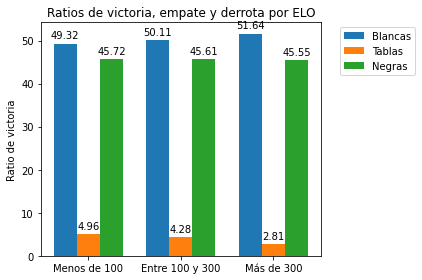

In [ ]:
labels = ["Menos de 100", "Entre 100 y 300", "Más de 300"]
white_rates = [white_percent_100, white_percent_100_300, white_percent_300]
draw_rates = [draw_percent_100, draw_percent_100_300, draw_percent_300]
black_rates = [black_percent_100, black_percent_100_300, black_percent_300]

width = 0.25  # Establecemos el ancho de las barras
x1 = np.arange(len(labels))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

fig, ax = plt.subplots()
rects1 = ax.bar(x1, white_rates, width, label='Blancas')
rects2 = ax.bar(x2, draw_rates, width, label='Tablas')
rects3 = ax.bar(x3, black_rates, width, label='Negras')

# Añadimos datos extra de la gráfica
ax.set_ylabel('Ratio de victoria')
ax.set_title('Ratios de victoria, empate y derrota por ELO')
ax.set_xticks(x2)
ax.set_xticklabels(labels)
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

def autolabel(rects):
    """Añadidos una etiqueta a cada uno de las barras, mostrando su valor."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

8.¿Influye el ser una partida con o sin ranking en el número de jugadas de una partida?

In [ ]:
turnos = games['turns']
turnos.groupby(games['rated']).mean()

turnos_rankeadas = games[games['rated']==True]
tr=round(turnos_rankeadas['turns'].mean(),0)
print(f"La media de jugadas cuando las partidas son válidas para ELO es {tr}.")

turnos_no_rankeadas = games[games['rated']==False]
tnr=round(turnos_no_rankeadas['turns'].mean(),0)
print(f"La media de jugadas cuando las partidas no son válidas para ELO es {tnr}.")

La media de jugadas cuando las partidas son válidas para ELO es 62.0.
La media de jugadas cuando las partidas no son válidas para ELO es 54.0.


8.b. Dibujar la gráfica

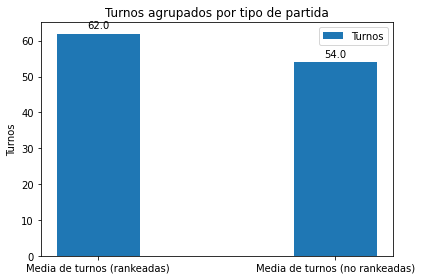

In [ ]:
labels = ['Media de turnos (rankeadas)', 'Media de turnos (no rankeadas)']
turnos_labels = [tr, tnr]

x = np.arange(len(labels))
width = 0.35  # El ancho de las barras

fig, ax = plt.subplots()
rects = ax.bar(x, turnos_labels, width, label='Turnos')

# Añadimos datos extra a la gráfica.
ax.set_ylabel('Turnos')
ax.set_title('Turnos agrupados por tipo de partida')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()

plt.show()

9.¿Cual es la apertuda más jugada?

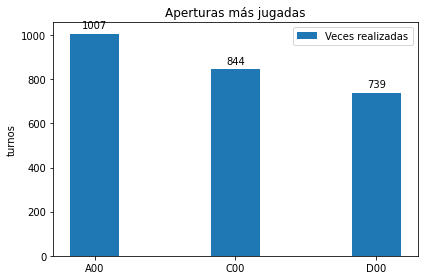

In [ ]:
count_openings = games.groupby(['opening_eco']).size().reset_index(name='counts')
openings_ordered = count_openings.sort_values('counts', ascending=False)

n1=openings_ordered.iloc[0]
n2=openings_ordered.iloc[1]
n3=openings_ordered.iloc[2]

labels = [n1['opening_eco'], n2['opening_eco'], n3['opening_eco']]
turnos_labels = [n1['counts'], n2['counts'], n3['counts']]

x = np.arange(len(labels))
width = 0.35  # Establecemos el ancho de las barras

fig, ax = plt.subplots()
rects = ax.bar(x, turnos_labels, width, label='Veces realizadas')

ax.set_ylabel('turnos')
ax.set_title('Aperturas más jugadas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects)

fig.tight_layout()

plt.show()

10.¿Como acaba la partida en ranking y sin ranking?


10.a ¿Cuál es el resultado más común?

In [ ]:
#Obtenemos el número de veces que ocurre cada combinación
ends_grouped = games.groupby(['rated', 'victory_status']).size().reset_index(name='counts')
#Separamos el DataFrame entre los que son de partidas con ranking
ends_rated = ends_grouped.loc[ends_grouped['rated'] == True]
ends_unrated = ends_grouped.loc[ends_grouped['rated'] == False]
#Ordenamos por "counts" y obtenemos los dos más
more_common_rated = ends_rated.sort_values('counts', ascending=False).iloc[0]
more_common_unrated = ends_unrated.sort_values('counts', ascending=False).iloc[0]
print(f"La razón por la que se finaliza más frecuentemente una partida en 'rated' es '{more_common_rated['victory_status']}' " + \
  f"con {more_common_rated['counts']} casos")
print(f"La razón por la que se finaliza más frecuentemente una partida en 'unrated' es '{more_common_unrated['victory_status']}' " + \
  f"con {more_common_unrated['counts']} casos")

La razón por la que se finaliza más frecuentemente una partida en 'rated' es 'resign' con 8969 casos
La razón por la que se finaliza más frecuentemente una partida en 'unrated' es 'resign' con 2178 casos


10.b. ¿Que porcentaje representa "resign"?

In [ ]:
total_rated = games.loc[games["rated"]==True]
total_unrated = games.loc[games["rated"]==False]
total_resign_rated = round((more_common_rated['counts'] / total_rated.shape[0]) * 100, 2)
total_resign_unrated = round((more_common_unrated['counts'] / total_unrated.shape[0]) * 100, 2)

print(f"El número de partidas acabadas por 'resign' en partidas con raking es del {total_resign_rated}%" )
print(f"El número de partidas acabadas por 'resign' en partidas sin raking es del {total_resign_unrated}%" )

El número de partidas acabadas por 'resign' en partidas con raking es del 55.52%
El número de partidas acabadas por 'resign' en partidas sin raking es del 55.8%


# Mapa de calor

Análisis de las casillas que más se utilizan en las partidas



In [ ]:
#MAPA DE CALOR DE LAS CASILLAS MÁS USADAS
import re

#obtenemos las jugadas
chess = pd.read_csv("data/games.csv")
chess_moves = chess[['moves']].copy()
chess_moves.head()

,moves
0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...


In [ ]:
#Añadimos las jugadas separadas por comas
def each_move(chess_moves):
    each = (chess_moves['moves']).split(' ')

    return each
chess_moves['each_move'] = chess_moves.apply(each_move, axis=1)

chess_moves.head()

,moves,each_move
0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb..."
1,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx..."
2,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4..."
3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6..."
4,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N..."


In [ ]:
#Ahora añadimos la columna donde obtenemos para cada jugada la casilla a la que vamos
def square(chess_moves):
    squares = []
    for m in chess_moves['each_move']:
        if m == 'O-O' or m == 'O-O+':
            if chess_moves['each_move'].index(m)%2 == 0:
                squares.append('g1')
                squares.append('f1')
            elif chess_moves['each_move'].index(m)%2 == 1:
                squares.append('g8')
                squares.append('f8')
        elif m == 'O-O-O' or m =='O-O-O+':
            if chess_moves['each_move'].index(m)%2 == 0:
                squares.append('c1')
                squares.append('d1')
            elif chess_moves['each_move'].index(m)%2 == 1:
                squares.append('c8')
                squares.append('d8')
        else:
            if '=' in m:
                squares.append(m.split('=')[0][-2:])
            elif m[-1] == '+' or m[-1] =='#':
                squares.append(m[-3:-1])
            else:
                squares.append(m[-2:])

    return squares
chess_moves['square'] = chess_moves.apply(square, axis=1)

chess_moves.head()

,moves,each_move,square
0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...","[d4, d5, c4, c6, d5, e6, e6, e6, f3, b4, c3, a..."
1,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...","[d4, c6, e4, e5, f4, f6, e5, e5, e5, e5, d4, c..."
2,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...","[e4, e5, d3, d6, e3, c6, e2, b5, d2, a5, a4, c..."
3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...","[d4, d5, f3, f5, c3, f6, f4, g4, e3, c6, e2, d..."
4,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...","[e4, e5, f3, d6, d4, c6, d5, b4, a3, a6, c3, e..."


In [ ]:
# Creamos un diccionario y guardamos las frecuencias
sq_count = {}
for s in chess_moves['square']:
    for i in s:
        sq_count[i] = sq_count.get(i, 0) + 1
# Normalizamos valores
def normalize(d, target=1.0):
   raw = sum(d.values())
   factor = target/raw
   return {key:round(value*factor*100,2) for key,value in d.items()}
sq_norm = normalize(sq_count)


In [ ]:
# Convertimos el diccionario en una lista
letter = ['a','b','c','d','e','f','g','h']
eight = []
for k in letter:
    eight.append(sq_norm[k+'8'])

sev = []
for k in letter:
    sev.append(sq_norm[k+'7'])

six = []
for k in letter:
    six.append(sq_norm[k+'6'])

fiv = []
for k in letter:
    fiv.append(sq_norm[k+'5'])

four = []
for k in letter:
    four.append(sq_norm[k+'4'])

thr = []
for k in letter:
    thr.append(sq_norm[k+'3'])

two = []
for k in letter:
    two.append(sq_norm[k+'2'])

one = []
for k in letter:
    one.append(sq_norm[k+'1'])



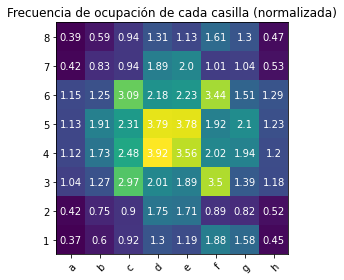

In [ ]:
# Dibujamos el tablero
number = ["8","7", "6", "5", "4",
              "3", "2", "1"]
alphabet = ["a", "b", "c",
           "d", "e", "f", "g","h"]
board = np.array([eight,sev,six,fiv,four,thr,two,one])


fig, ax = plt.subplots()
im = ax.imshow(board)

ax.set_xticks(np.arange(len(alphabet)))
ax.set_yticks(np.arange(len(number)))
ax.set_xticklabels(alphabet)
ax.set_yticklabels(number)

# Rotamos las etiquetas.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Iteramos sobre los datos y los etiquetamos.
for i in range(len(number)):
    for j in range(len(alphabet)):
        text = ax.text(j, i, board[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Frecuencia de ocupación de cada casilla (normalizada)")
fig.tight_layout()
plt.show()

# Líneas futuras

*    Sería interesante investigar acerca de la duración de las partidas
*    Un historico de los usuarios para ver evoluciones de éstos
*    Profundizar en las diferencias entre partidas con y sin ranking